In [1]:
import matplotlib.pyplot as plt
import albumentations as A
from PIL import Image
import numpy as np
import os
import random
import cv2


ModuleNotFoundError: No module named 'albumentations'

In [ ]:
%pip install albumentations

  Using cached albumentations-1.4.22-py3-none-any.whl.metadata (33 kB)
  Using cached pydantic-2.10.3-py3-none-any.whl.metadata (172 kB)
  Using cached albucore-0.0.21-py3-none-any.whl.metadata (5.3 kB)
  Using cached eval_type_backport-0.2.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached opencv-python-headless-4.10.0.84.tar.gz (95.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached stringzilla-3.11.0-cp311-cp311-macosx_10_11_x86_64.whl.metadata (79 kB)
  Using cached simsimd-6.2.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (66 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.27.1-cp311-cp311-macosx_10_12_x86_64.whl.metadata (6.6 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached albumentations-1.4.22-py3-none-any.whl (258 kB)
Using cached albucore-0.0.21-py3-none-any.whl (12 kB)
Usi

In [ ]:

dataset_folder = "Mini_BAGLS_dataset"

files = [file for file in os.listdir(dataset_folder) if file.endswith(".meta")]
random.seed(23127630)
file = random.choice(files)

In [ ]:
print(file)

42.meta


def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    image = cv2.resize(image, (256, 512))
    mask = cv2.resize(mask, (256, 512))
    
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[0, 1].imshow(original_mask, cmap='gray')
        ax[0, 1].set_title('Original mask', fontsize=fontsize)
        
        ax[1, 0].imshow(image)
        ax[1, 0].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask, cmap='gray')
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [ ]:

dataset_folder = "Mini_BAGLS_dataset"

files = [file for file in os.listdir(dataset_folder) if file.endswith(".meta")]

#Select four random files
file = np.random.choice(100, 1)
#files = ['15.meta', '18.meta', '99.meta', '79.meta']

image = cv2.imread(dataset_folder + '/42.png')

mask = cv2.imread(dataset_folder + '/42_seg.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
original_height, original_width = image.shape[:2]


# image = cv2.resize(image, (128, 256))
# mask = cv2.resize(mask, (128, 256))

(512, 256, 3)


In [ ]:
#HorizontalFlip
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

#visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

In [ ]:
#rotate
aug = A.RandomRotate90(p=1)
#aug = A.Rotate(limit=50, p=1)
augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

#visualize(image_rot90, mask_rot90, original_image=image, original_mask=mask)

In [ ]:
# OpticalDistortion
#aug = A.OpticalDistortion(distort_limit=1.5, shift_limit=10, p=1)
aug = A.GridDistortion(distort_limit=1.5, shift_limit=10, p=1)
random.seed(7)
augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

#visualize(image_optical, mask_optical, original_image=image, original_mask=mask)

In [ ]:
#aug = A.RandomCrop(height=250, width=200, p=1)
aug = A.CenterCrop(height=250, width=200, p=1)

random.seed(78)
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

# image_scaled = cv2.resize(image_scaled, (256, 512))
# mask_scaled = cv2.resize(mask_scaled, (256, 512))

#visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

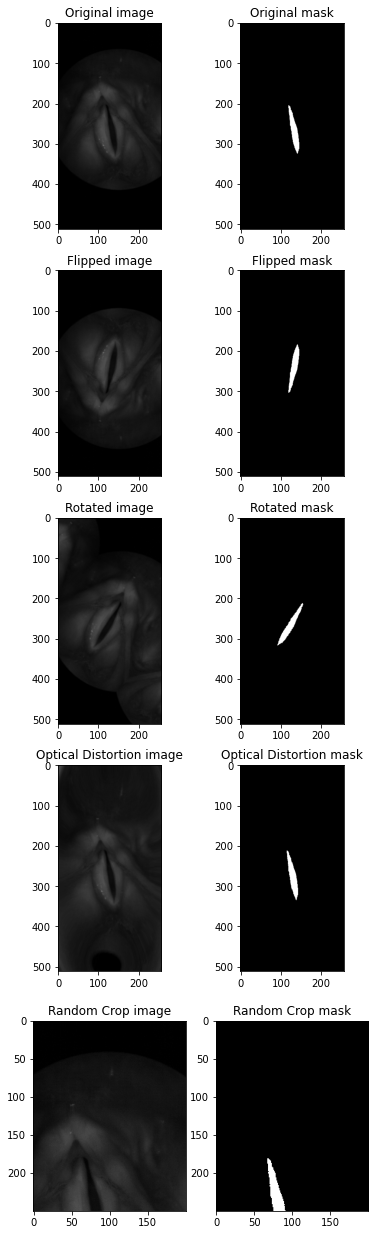

In [ ]:
fontsize = 12
f, ax = plt.subplots(5, 2, figsize=(6, 22))

ax[0, 0].imshow(image)
ax[0, 0].set_title('Original image', fontsize=fontsize)
        
ax[0, 1].imshow(mask, cmap='gray')
ax[0, 1].set_title('Original mask', fontsize=fontsize)
        
ax[1, 0].imshow(image_h_flipped)
ax[1, 0].set_title('Horizontally Flipped image', fontsize=fontsize)
        
ax[1, 1].imshow(mask_h_flipped, cmap='gray')
ax[1, 1].set_title('Horizontally Flipped mask', fontsize=fontsize)
        
ax[2, 0].imshow(image_rot90)
ax[2, 0].set_title('Random Rotated image', fontsize=fontsize)
        
ax[2, 1].imshow(mask_rot90, cmap='gray')
ax[2, 1].set_title('Random Rotated mask', fontsize=fontsize)
        
ax[3, 0].imshow(image_optical)
ax[3, 0].set_title('Grid Distortion image', fontsize=fontsize)
        
ax[3, 1].imshow(mask_optical, cmap='gray')
ax[3, 1].set_title('Grid Distortion mask', fontsize=fontsize)
        
ax[4, 0].imshow(image_scaled)
ax[4, 0].set_title('Center Crop image', fontsize=fontsize)
        
ax[4, 1].imshow(mask_scaled, cmap='gray')
ax[4, 1].set_title('Center Crop mask', fontsize=fontsize)

plt.savefig('task2.svg')